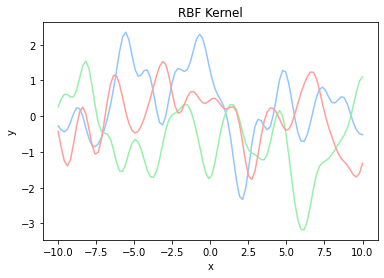

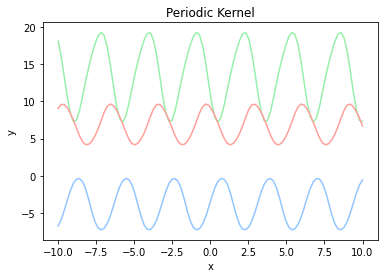

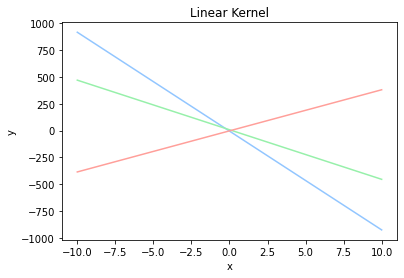

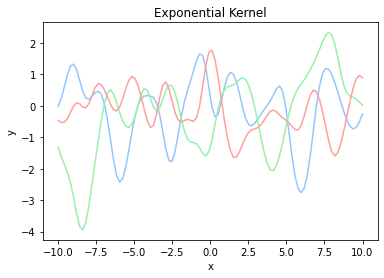

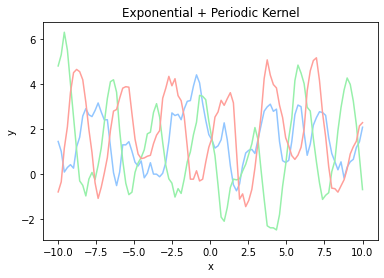

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')
import numpy as np
from scipy.stats import norm
from kernels import rbf, periodic, exp, linear

In [5]:
def UCB(mean, var):
    return mean + 1.0 * var

In [6]:
def objective(x):
    return 2 * np.sin(x) + 3 * np.cos(2 * x) + 5 * np.sin(2 / 3 * x)

In [7]:
def train_test_split(x, y, test_size):
    assert len(x) == len(y)
    n_samples = len(x)
    test_indices = np.sort(
        np.random.choice(
            np.arange(n), int(
                n_samples * test_size), replace=False))
    train_indices = np.ones(n_samples, dtype=bool)
    train_indices[test_indices] = False
    test_indices = ~ train_indices

    return x[train_indices], x[test_indices], y[train_indices], y[test_indices]


n = 100
data_x = np.linspace(0, 4 * np.pi, n)
data_y = objective(data_x)


x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.70)

In [9]:
def plot_aquisition(x_train, y_train, x_test, mu, var):
    plt.figure(figsize=(16, 8))
    plt.title('Gaussian Process Regressor', fontsize=20)

    plt.plot(data_x, data_y, label='objective')
    plt.plot(
        x_train,
        y_train,
        'o',
        label='train data')

    std = np.sqrt(np.abs(var))

    plt.plot(x_test, mu, label='mean')

    plt.fill_between(
        x_test,
        mu + 2 * std,
        mu - 2 * std,
        alpha=.2,
        label='standard deviation')
    plt.legend(
        loc='lower left',
        fontsize=12)
    plt.savefig('acquisition.png')

In [10]:
def gpr(x_train, y_train, x_test, kernel):
    # average
    mu = []
    # variance
    var = []

    train_length = len(x_train)
    test_length = len(x_test)

    K = np.zeros((train_length, train_length))
    for x_idx in range(train_length):
        for x_prime_idx in range(train_length):
            K[x_idx, x_prime_idx] = kernel(x_train[x_idx], x_train[x_prime_idx])

    yy = np.dot(np.linalg.inv(K), y_train)

    for x_test_idx in range(test_length):
        k = np.zeros((train_length,))
        for x_idx in range(train_length):
            k[x_idx] = kernel(
                x_train[x_idx],
                x_test[x_test_idx])
        s = kernel(
            x_test[x_test_idx],
            x_test[x_test_idx])
        mu.append(np.dot(k, yy))
        kK_ = np.dot(k, np.linalg.inv(K))
        var.append(s - np.dot(kK_, k.T))
    return mu, var

In [ ]:
mu, var = gpr(x_train, y_train, x_test, kernel)
plot_gpr(x_train, y_train, x_test, mu, var)